In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import Dataset

trainloader = Dataset.trainloader
testloader =  Dataset.testloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


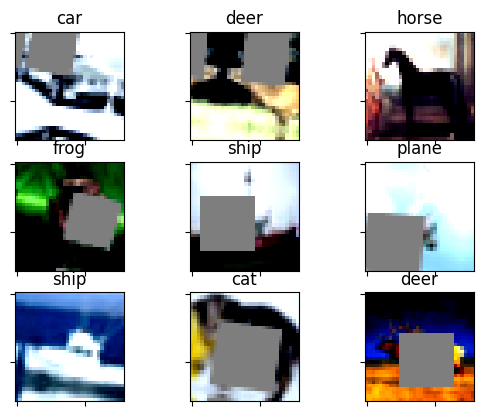

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print labels
for i in range(0,9):
 plt.subplot(3, 3, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((images[i]/2)+0.5).numpy(),(1,2,0)))
 plt.title(classes[labels[i]])

#Network

In [5]:
import Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = Net.Net('bn').to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             864
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           4,608
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 96, 32, 32]          13,824
      BatchNorm2d-14           [-1

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, nesterov=True, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.00005, max_lr=0.05, step_size_up=40, step_size_down=60, mode='triangular2')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
learning_rate = []
for epoch in range(300):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
    learning_rate.append(param_group['lr'])
print('Finished Training')

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 0 Loss=1.891374945640564 Accuracy=30.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 35.07 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 1 Loss=1.8585172891616821 Accuracy=36.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 45.32 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 2 Loss=1.5188087224960327 Accuracy=36.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 50.91 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 3 Loss=1.6541993618011475 Accuracy=52.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 55.05 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 4 Loss=1.5383673906326294 Accuracy=52.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 58.67 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 5 Loss=1.1080131530761719 Accuracy=65.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.35 %
lr=  0.008791250000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 6 Loss=1.6003320217132568 Accuracy=50.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.34 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 7 Loss=1.4778937101364136 Accuracy=53.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 62.80 %
lr=  0.01128875000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 8 Loss=1.4140307903289795 Accuracy=52.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 66.11 %
lr=  0.01253750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 9 Loss=1.538583517074585 Accuracy=56.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 65.56 %
lr=  0.013786250000000012


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 10 Loss=0.948486328125 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.32 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 11 Loss=1.1443623304367065 Accuracy=62.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 69.68 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 12 Loss=1.2346926927566528 Accuracy=58.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68.79 %
lr=  0.017532500000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 13 Loss=1.1532831192016602 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68.43 %
lr=  0.018781249999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 14 Loss=1.0008600950241089 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.30 %
lr=  0.020029999999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 15 Loss=1.2542078495025635 Accuracy=53.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.20 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 16 Loss=1.0217958688735962 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 69.62 %
lr=  0.022527499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 17 Loss=1.055271863937378 Accuracy=65.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.43 %
lr=  0.023776249999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 18 Loss=1.1837114095687866 Accuracy=62.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.72 %
lr=  0.025024999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 19 Loss=0.8746644854545593 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 71.78 %
lr=  0.02627375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 20 Loss=1.0108919143676758 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.34 %
lr=  0.0275225


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 21 Loss=0.8218370676040649 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.27 %
lr=  0.02877125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 22 Loss=1.1681702136993408 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.49 %
lr=  0.03002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 23 Loss=0.8756575584411621 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.95 %
lr=  0.03126875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 24 Loss=0.8995892405509949 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.77 %
lr=  0.032517500000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 25 Loss=1.045127511024475 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.86 %
lr=  0.033766250000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 26 Loss=0.9870120882987976 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.94 %
lr=  0.035015000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 27 Loss=1.107928991317749 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.71 %
lr=  0.036263750000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 28 Loss=0.8532886505126953 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.20 %
lr=  0.03751250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 29 Loss=1.0580098628997803 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.67 %
lr=  0.03876125000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 30 Loss=0.9030515551567078 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.83 %
lr=  0.04001000000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 31 Loss=1.223382592201233 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.83 %
lr=  0.04125875000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 32 Loss=0.9334657788276672 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.26 %
lr=  0.04250750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 33 Loss=1.1966426372528076 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.10 %
lr=  0.04375625000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 34 Loss=1.0048826932907104 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.19 %
lr=  0.04500499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 35 Loss=0.9210063219070435 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.20 %
lr=  0.04625375000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 36 Loss=1.0370639562606812 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.04 %
lr=  0.04750249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 37 Loss=0.9917066693305969 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.80 %
lr=  0.04875125000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 38 Loss=1.2709800004959106 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.62 %
lr=  0.04999999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 39 Loss=1.097269058227539 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.16 %
lr=  0.04916750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 40 Loss=0.9290071725845337 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.22 %
lr=  0.04833500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 41 Loss=0.8174964785575867 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.50 %
lr=  0.04750250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 42 Loss=0.9264899492263794 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.73 %
lr=  0.04667000000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 43 Loss=1.1363658905029297 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.90 %
lr=  0.0458375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 44 Loss=0.9751459956169128 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.67 %
lr=  0.04500500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 45 Loss=0.841829776763916 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.52 %
lr=  0.0441725


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 46 Loss=0.9976977109909058 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.18 %
lr=  0.043340000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 47 Loss=1.1667749881744385 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.28 %
lr=  0.042507500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 48 Loss=0.9434551000595093 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.26 %
lr=  0.041675000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 49 Loss=0.7911105751991272 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.51 %
lr=  0.040842500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 50 Loss=0.8966544270515442 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.20 %
lr=  0.040010000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 51 Loss=0.719979465007782 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.30 %
lr=  0.039177500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 52 Loss=0.8909393548965454 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.77 %
lr=  0.038345


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 53 Loss=0.8498819470405579 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.51 %
lr=  0.037512500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 54 Loss=1.0629487037658691 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.18 %
lr=  0.03668


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 55 Loss=0.8380106091499329 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.51 %
lr=  0.03584750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 56 Loss=0.9082694053649902 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.40 %
lr=  0.035015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 57 Loss=0.8984308242797852 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.51 %
lr=  0.03418250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 58 Loss=0.9204529523849487 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.63 %
lr=  0.03335


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 59 Loss=1.0213521718978882 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.02 %
lr=  0.03251750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 60 Loss=0.9917957186698914 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.37 %
lr=  0.031685


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 61 Loss=0.8659331202507019 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.50 %
lr=  0.030852500000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 62 Loss=0.9985098838806152 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.61 %
lr=  0.030019999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 63 Loss=0.8265889286994934 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.23 %
lr=  0.02918750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 64 Loss=0.8897523880004883 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.30 %
lr=  0.02835499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 65 Loss=0.9863478541374207 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.99 %
lr=  0.02752250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 66 Loss=0.7925173044204712 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.04 %
lr=  0.02668999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 67 Loss=0.640876054763794 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.57 %
lr=  0.02585750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 68 Loss=0.8317679166793823 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.33 %
lr=  0.02502500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 69 Loss=0.8410615921020508 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.99 %
lr=  0.024192500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 70 Loss=0.7546976208686829 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.36 %
lr=  0.023360000000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 71 Loss=0.6629036068916321 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.03 %
lr=  0.022527500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 72 Loss=0.729529619216919 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.74 %
lr=  0.021695000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 73 Loss=0.7855408191680908 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.46 %
lr=  0.020862500000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 74 Loss=0.8861933946609497 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.68 %
lr=  0.020030000000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 75 Loss=0.7241889834403992 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.62 %
lr=  0.0191975


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 76 Loss=0.8441663980484009 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.77 %
lr=  0.018365


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 77 Loss=0.9053834080696106 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.59 %
lr=  0.0175325


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 78 Loss=1.0461640357971191 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.98 %
lr=  0.0167


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 79 Loss=0.9981653094291687 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.17 %
lr=  0.0158675


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 80 Loss=0.8446416854858398 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.32 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 81 Loss=0.8403749465942383 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.10 %
lr=  0.014202499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 82 Loss=0.6760285496711731 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.21 %
lr=  0.013370000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 83 Loss=0.8215228319168091 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.21 %
lr=  0.012537499999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 84 Loss=1.01560640335083 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.44 %
lr=  0.01170500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 85 Loss=0.8624869585037231 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.45 %
lr=  0.010872499999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 86 Loss=0.8044658899307251 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.24 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 87 Loss=0.6660775542259216 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.85 %
lr=  0.00920749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 88 Loss=0.7743374109268188 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.26 %
lr=  0.008375000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 89 Loss=0.6014043092727661 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.78 %
lr=  0.0075424999999999884


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 90 Loss=0.7331808805465698 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.91 %
lr=  0.006710000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 91 Loss=1.0026767253875732 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.00 %
lr=  0.005877499999999987


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 92 Loss=0.5417839288711548 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.10 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 93 Loss=0.8910361528396606 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.23 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 94 Loss=0.8871844410896301 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.48 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 95 Loss=0.6578773260116577 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.48 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 96 Loss=0.7539698481559753 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.75 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 97 Loss=0.783076286315918 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.53 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 98 Loss=0.5788411498069763 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.00 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 99 Loss=0.7612215876579285 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.92 %
lr=  0.0006743749999999867


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 100 Loss=0.5960453152656555 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.94 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 101 Loss=1.0259373188018799 Accuracy=60.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.90 %
lr=  0.0019231250000000155


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 102 Loss=0.4880651831626892 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.71 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 103 Loss=0.7702928781509399 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.13 %
lr=  0.003171874999999989


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 104 Loss=0.8008600473403931 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.19 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 105 Loss=0.6562644839286804 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.59 %
lr=  0.004420625000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 106 Loss=0.5425307750701904 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.73 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 107 Loss=0.8737857937812805 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.54 %
lr=  0.005669374999999991


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 108 Loss=0.5755618214607239 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.24 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 109 Loss=0.6970303654670715 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.60 %
lr=  0.00691812500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 110 Loss=0.9390912055969238 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.20 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 111 Loss=0.5894806981086731 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.33 %
lr=  0.008166874999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 112 Loss=0.9320677518844604 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.10 %
lr=  0.00879124999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 113 Loss=0.7297617197036743 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.38 %
lr=  0.009415624999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 114 Loss=0.8066752552986145 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.21 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 115 Loss=0.825355052947998 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.60 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 116 Loss=0.8980282545089722 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.70 %
lr=  0.011288749999999983


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 117 Loss=0.9293109178543091 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.43 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 118 Loss=0.8759690523147583 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.40 %
lr=  0.01253750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 119 Loss=0.6697197556495667 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.80 %
lr=  0.013161874999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 120 Loss=0.8570681810379028 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.25 %
lr=  0.013786249999999984


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 121 Loss=0.8400384187698364 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.33 %
lr=  0.014410625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 122 Loss=0.9983846545219421 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.96 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 123 Loss=0.842388927936554 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.37 %
lr=  0.015659375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 124 Loss=0.9268598556518555 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.46 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 125 Loss=0.648117184638977 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.65 %
lr=  0.016908125000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 126 Loss=0.8908788561820984 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.93 %
lr=  0.017532500000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 127 Loss=1.0579075813293457 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.50 %
lr=  0.018156875000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 128 Loss=0.7179542779922485 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.98 %
lr=  0.018781249999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 129 Loss=0.8453885316848755 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.21 %
lr=  0.019405625000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 130 Loss=1.1083709001541138 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.30 %
lr=  0.02003000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 131 Loss=0.8559918403625488 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.48 %
lr=  0.020654375000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 132 Loss=1.0063068866729736 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.60 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 133 Loss=0.7801001071929932 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.02 %
lr=  0.021903125000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 134 Loss=0.7768754959106445 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.37 %
lr=  0.022527500000000023


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 135 Loss=0.941827118396759 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.55 %
lr=  0.02315187500000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 136 Loss=0.7885364294052124 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.81 %
lr=  0.023776249999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 137 Loss=0.9364916086196899 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.55 %
lr=  0.02440062499999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 138 Loss=0.942488968372345 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.54 %
lr=  0.025024999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 139 Loss=0.8950616121292114 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.74 %
lr=  0.02460875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 140 Loss=0.8869047164916992 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.04 %
lr=  0.024192500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 141 Loss=0.7988389730453491 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.47 %
lr=  0.023776250000000016


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 142 Loss=0.8912376165390015 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.28 %
lr=  0.023360000000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 143 Loss=0.7506763339042664 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.49 %
lr=  0.022943749999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 144 Loss=0.722425639629364 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.66 %
lr=  0.022527500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 145 Loss=0.6976279020309448 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.00 %
lr=  0.022111250000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 146 Loss=0.9151328802108765 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.92 %
lr=  0.021695000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 147 Loss=1.12043035030365 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.89 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 148 Loss=1.1487672328948975 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.98 %
lr=  0.020862500000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 149 Loss=0.7164264917373657 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.58 %
lr=  0.020446250000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 150 Loss=0.7756985425949097 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.30 %
lr=  0.020030000000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 151 Loss=0.92750483751297 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.74 %
lr=  0.019613749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 152 Loss=0.8709100484848022 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.67 %
lr=  0.0191975


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 153 Loss=0.711847722530365 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.73 %
lr=  0.01878125000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 154 Loss=0.6779953241348267 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.78 %
lr=  0.018365


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 155 Loss=0.8077911138534546 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.26 %
lr=  0.017948749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 156 Loss=0.8772323727607727 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.24 %
lr=  0.0175325


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 157 Loss=0.8657662272453308 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.23 %
lr=  0.017116250000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 158 Loss=0.6857143640518188 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.22 %
lr=  0.0167


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 159 Loss=0.5733574628829956 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.14 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 160 Loss=0.9146555066108704 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.32 %
lr=  0.0158675


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 161 Loss=0.7010934948921204 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.12 %
lr=  0.015451250000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 162 Loss=0.7119301557540894 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.32 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 163 Loss=0.7669045329093933 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.15 %
lr=  0.014618750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 164 Loss=0.9339168667793274 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.79 %
lr=  0.014202499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 165 Loss=0.8586441278457642 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.09 %
lr=  0.013786250000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 166 Loss=0.7499924302101135 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.04 %
lr=  0.013370000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 167 Loss=0.7677385807037354 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.62 %
lr=  0.012953750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 168 Loss=1.006360411643982 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.51 %
lr=  0.012537499999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 169 Loss=1.0450587272644043 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.01 %
lr=  0.012121250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 170 Loss=0.8298412561416626 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.94 %
lr=  0.01170500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 171 Loss=0.7751772403717041 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.07 %
lr=  0.011288750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 172 Loss=0.8800724744796753 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.33 %
lr=  0.010872499999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 173 Loss=0.8356705904006958 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.50 %
lr=  0.01045625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 174 Loss=0.6929901242256165 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.61 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 175 Loss=0.7181093096733093 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.60 %
lr=  0.009623749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 176 Loss=0.7999219298362732 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.37 %
lr=  0.00920749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 177 Loss=0.8922775983810425 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.98 %
lr=  0.008791249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 178 Loss=0.882544219493866 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.48 %
lr=  0.008375000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 179 Loss=1.0416536331176758 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.85 %
lr=  0.007958749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 180 Loss=0.7423444390296936 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.54 %
lr=  0.0075424999999999884


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 181 Loss=0.8279824256896973 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.31 %
lr=  0.007126249999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 182 Loss=0.746354877948761 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.08 %
lr=  0.006710000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 183 Loss=0.8746147155761719 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.04 %
lr=  0.006293749999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 184 Loss=0.769741415977478 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.04 %
lr=  0.005877499999999987


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 185 Loss=0.6306203007698059 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.70 %
lr=  0.005461249999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 186 Loss=0.6644350290298462 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.80 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 187 Loss=0.7293345928192139 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.53 %
lr=  0.004628750000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 188 Loss=0.9181259274482727 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.68 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 189 Loss=0.5698077082633972 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.36 %
lr=  0.0037962499999999945


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 190 Loss=0.6026683449745178 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.88 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 191 Loss=0.6454446911811829 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.67 %
lr=  0.002963750000000012


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 192 Loss=1.0068442821502686 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.10 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 193 Loss=0.5650143027305603 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.06 %
lr=  0.002131249999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 194 Loss=0.5032650232315063 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.11 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 195 Loss=0.5528904795646667 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.26 %
lr=  0.0012987500000000104


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 196 Loss=0.7599664926528931 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.20 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 197 Loss=0.8525217175483704 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.49 %
lr=  0.0004662499999999912


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 198 Loss=0.7504953145980835 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.90 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 199 Loss=0.6167578101158142 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.72 %
lr=  0.0003621874999999934


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 200 Loss=0.6027334332466125 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.79 %
lr=  0.0006743750000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 201 Loss=0.7284908890724182 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.41 %
lr=  0.000986562499999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 202 Loss=0.7277041673660278 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.57 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 203 Loss=0.8553932309150696 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.58 %
lr=  0.0016109374999999943


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 204 Loss=0.7570775747299194 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.96 %
lr=  0.0019231250000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 205 Loss=0.606535792350769 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.16 %
lr=  0.002235312499999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 206 Loss=0.4880685806274414 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.39 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 207 Loss=0.5959669947624207 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.62 %
lr=  0.002859687499999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 208 Loss=0.6457816958427429 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.44 %
lr=  0.003171875000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 209 Loss=0.5610898733139038 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.51 %
lr=  0.0034840624999999963


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 210 Loss=0.720075786113739 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.80 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 211 Loss=0.6819280982017517 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.66 %
lr=  0.004108437499999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 212 Loss=0.563888430595398 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.15 %
lr=  0.0044206250000000035


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 213 Loss=0.5565131902694702 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.08 %
lr=  0.0047328124999999974


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 214 Loss=0.6476788520812988 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.00 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 215 Loss=0.7679895162582397 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.71 %
lr=  0.005357187499999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 216 Loss=0.6941400766372681 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.61 %
lr=  0.005669375000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 217 Loss=0.7761800289154053 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.67 %
lr=  0.005981562499999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 218 Loss=0.7773985266685486 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.55 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 219 Loss=1.009878158569336 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.80 %
lr=  0.006605937499999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 220 Loss=0.7094729542732239 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.03 %
lr=  0.006918125000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 221 Loss=0.6041989922523499 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.78 %
lr=  0.0072303125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 222 Loss=0.6544119119644165 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.27 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 223 Loss=0.6359618902206421 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.60 %
lr=  0.0078546875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 224 Loss=0.6345121264457703 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.22 %
lr=  0.008166874999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 225 Loss=0.8415115475654602 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.32 %
lr=  0.0084790625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 226 Loss=0.7942384481430054 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.93 %
lr=  0.008791249999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 227 Loss=0.9129956960678101 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.99 %
lr=  0.0091034375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 228 Loss=0.7504681944847107 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.14 %
lr=  0.009415624999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 229 Loss=0.5600973963737488 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.31 %
lr=  0.009727812500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 230 Loss=0.5708666443824768 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.61 %
lr=  0.010039999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 231 Loss=0.897386372089386 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.60 %
lr=  0.010352187500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 232 Loss=0.8684645891189575 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.84 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 233 Loss=0.734694242477417 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.01 %
lr=  0.010976562500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 234 Loss=0.8064867854118347 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.51 %
lr=  0.011288749999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 235 Loss=0.6723632216453552 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.14 %
lr=  0.011600937500000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 236 Loss=0.7057794332504272 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.27 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 237 Loss=0.8641837239265442 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.50 %
lr=  0.012225312500000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 238 Loss=0.7220284938812256 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.89 %
lr=  0.012537499999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 239 Loss=0.7014025449752808 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.14 %
lr=  0.012329374999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 240 Loss=0.759539008140564 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.89 %
lr=  0.012121250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 241 Loss=0.9261448979377747 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.09 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 242 Loss=0.7449136972427368 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.71 %
lr=  0.011705000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 243 Loss=0.7961587905883789 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.81 %
lr=  0.011496874999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 244 Loss=1.0355417728424072 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.45 %
lr=  0.011288750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 245 Loss=0.9510709643363953 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.46 %
lr=  0.011080624999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 246 Loss=0.8561933636665344 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.51 %
lr=  0.0108725


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 247 Loss=0.7112454175949097 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.72 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 248 Loss=0.6897293329238892 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.46 %
lr=  0.01045625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 249 Loss=0.765834629535675 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.31 %
lr=  0.010248125000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 250 Loss=0.8937592506408691 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.96 %
lr=  0.01004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 251 Loss=0.9390382766723633 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.29 %
lr=  0.009831875000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 252 Loss=0.7430062294006348 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.47 %
lr=  0.009623749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 253 Loss=0.8417816162109375 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.87 %
lr=  0.009415625000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 254 Loss=0.8681861162185669 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.33 %
lr=  0.009207499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 255 Loss=0.9620197415351868 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.41 %
lr=  0.008999375000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 256 Loss=0.9308156967163086 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.59 %
lr=  0.008791249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 257 Loss=0.782166600227356 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.64 %
lr=  0.008583125000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 258 Loss=0.9309514164924622 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.05 %
lr=  0.008374999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 259 Loss=0.8351805806159973 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.66 %
lr=  0.008166875000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 260 Loss=0.8617511987686157 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.34 %
lr=  0.007958749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 261 Loss=0.6100271940231323 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.99 %
lr=  0.007750625000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 262 Loss=0.7532917261123657 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.54 %
lr=  0.007542499999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 263 Loss=0.5697951316833496 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.69 %
lr=  0.0073343750000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 264 Loss=0.7884966135025024 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.56 %
lr=  0.007126249999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 265 Loss=0.9047222137451172 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.98 %
lr=  0.0069181250000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 266 Loss=0.6350206136703491 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.33 %
lr=  0.006709999999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 267 Loss=0.6758013963699341 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.08 %
lr=  0.006501875000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 268 Loss=0.7134843468666077 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.84 %
lr=  0.006293749999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 269 Loss=0.8337135314941406 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.74 %
lr=  0.006085625000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 270 Loss=0.6984735727310181 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.24 %
lr=  0.005877499999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 271 Loss=0.8629846572875977 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.26 %
lr=  0.005669375000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 272 Loss=0.7855270504951477 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.61 %
lr=  0.005461249999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 273 Loss=0.6965944170951843 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.03 %
lr=  0.005253125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 274 Loss=0.6041223406791687 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.32 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 275 Loss=0.9139874577522278 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.24 %
lr=  0.004836874999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 276 Loss=0.6769062280654907 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.62 %
lr=  0.004628750000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 277 Loss=0.9142980575561523 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.24 %
lr=  0.004420624999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 278 Loss=0.7335116863250732 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.14 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 279 Loss=0.5363067388534546 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.77 %
lr=  0.004004374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 280 Loss=0.5578871965408325 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.66 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 281 Loss=0.6675200462341309 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.15 %
lr=  0.003588124999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 282 Loss=0.5585662126541138 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.63 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 283 Loss=0.6161842346191406 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.24 %
lr=  0.0031718749999999985


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 284 Loss=0.6582137942314148 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.75 %
lr=  0.002963750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 285 Loss=0.629132866859436 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.11 %
lr=  0.002755624999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 286 Loss=0.8330586552619934 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.78 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 287 Loss=0.5574105978012085 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.97 %
lr=  0.0023393749999999977


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 288 Loss=0.5562542676925659 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.57 %
lr=  0.002131250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 289 Loss=0.690715491771698 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.73 %
lr=  0.001923124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 290 Loss=0.7100786566734314 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.24 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 291 Loss=0.4982626438140869 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.93 %
lr=  0.0015068749999999967


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 292 Loss=0.5017415285110474 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.64 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 293 Loss=0.6102342009544373 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.90 %
lr=  0.0010906249999999963


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 294 Loss=0.7473186254501343 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.19 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 295 Loss=0.5816282629966736 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.22 %
lr=  0.000674374999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 296 Loss=0.5618727803230286 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.38 %
lr=  0.00046625000000000046


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 297 Loss=0.7040709257125854 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.59 %
lr=  0.0002581249999999956


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 298 Loss=0.42116037011146545 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.53 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 299 Loss=0.5519573092460632 Accuracy=80.00


100%|██████████| 79/79 [00:05<00:00, 15.42it/s]

Accuracy of the network on the 10000 test images: 86.57 %
Finished Training


## Train/Test/LR curve

Text(0, 0.5, 'lr')

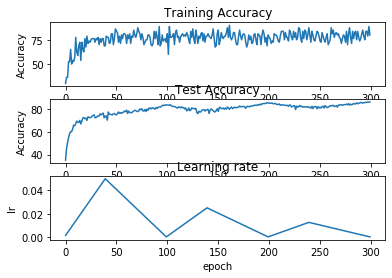

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")
axs[2].plot(learning_rate)
axs[2].set_title("Learning rate")
axs[2].set_xlabel("epoch")
axs[2].set_ylabel("lr")

## Misclassified Images

  0%|          | 0/79 [00:03<?, ?it/s]


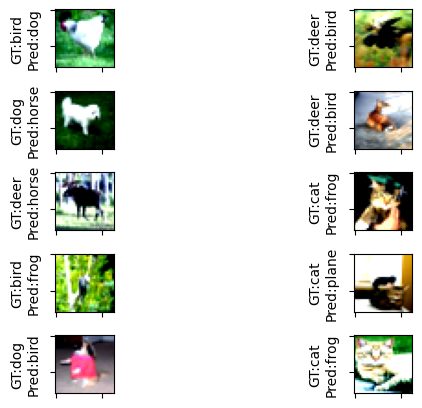

In [9]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(64):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))



## Correctly classified Images

  0%|          | 0/79 [00:04<?, ?it/s]


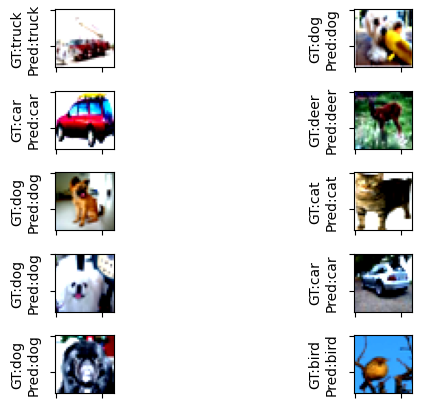

In [10]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(64):
              if target1[i]==predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))

